<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/Boosting/Adaboost_hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [9]:
np.random.seed(42)

In [10]:
x, y = make_circles(n_samples=650, factor=0.1, noise=0.45, random_state=42)


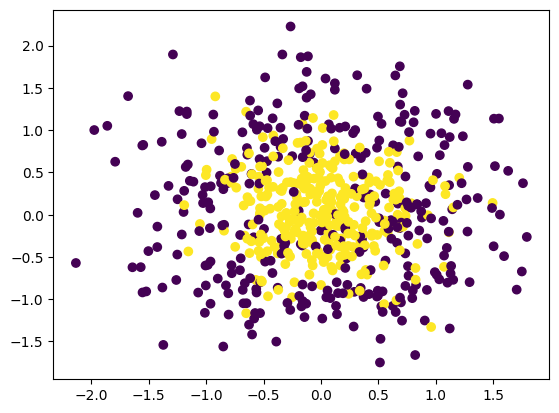

In [11]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
adaboost = AdaBoostClassifier()
np.mean(cross_val_score(adaboost, x, y, cv=5))

np.float64(0.7938461538461538)

In [13]:
adaboost.fit(x, y)

AdaBoostClassifier()

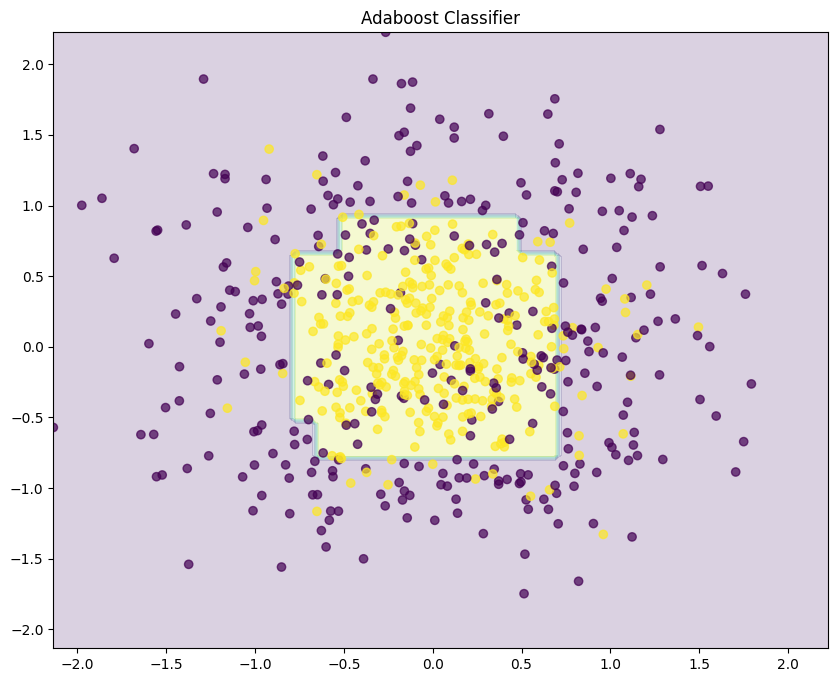

In [16]:
def plot_decision_boundary(clf):
  plt.figure(figsize=(10, 8))
  x_range = np.linspace(x.min(), x.max(), 100)
  xx1, xx2 = np.meshgrid(x_range, x_range)
  y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
  y_hat = y_hat.reshape(xx1.shape)
  plt.contourf(xx1, xx2, y_hat, alpha=0.2)
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
  plt.title("Adaboost Classifier")
  plt.show()

plot_decision_boundary(adaboost)

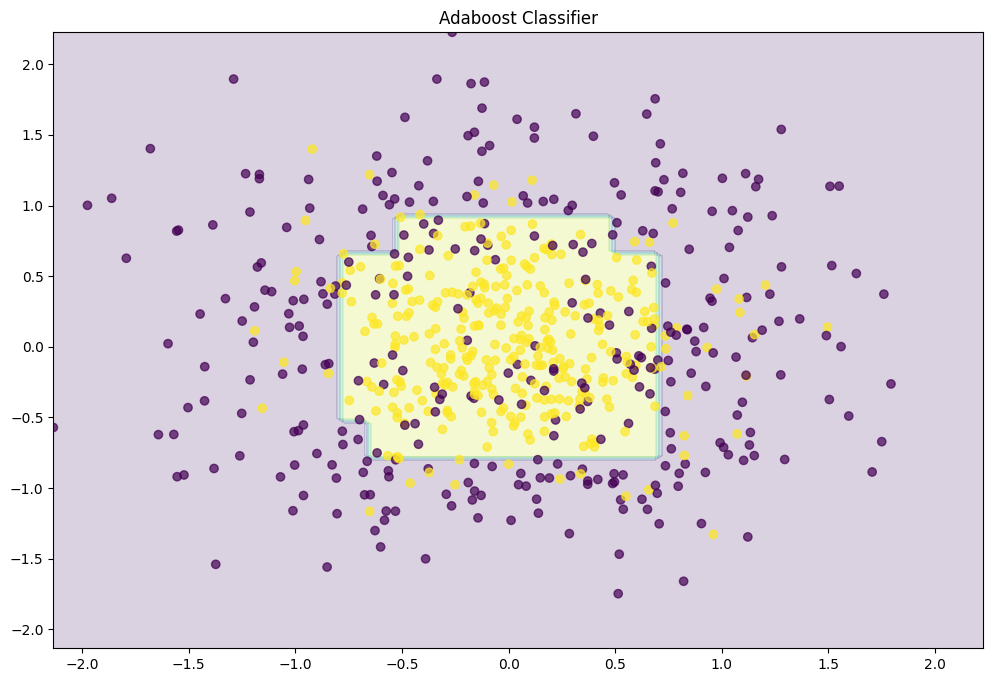

In [15]:
adaboost = AdaBoostClassifier(n_estimators=1500, learning_rate=0.1)
# learning rate is the hyperparameter that controls the contribution of each weak learner to the final strong classifier
# it acts as a shrinkage factor, scaling down the influence of each individual classifier's prediction
adaboost.fit(x, y)
plot_decision_boundary(adaboost)

In [17]:
from sklearn.model_selection import GridSearchCV
grid = dict()

grid['n_estimators'] = [10, 50, 100, 500]
# the maximum number of estimators at which boosting is terminated.
# In case of perfect fit, the learning procedure is stopped early.
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

grid = GridSearchCV(estimator=adaboost, param_grid=grid, cv=5, scoring='accuracy')

grid_result = grid.fit(x, y)

In [18]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [19]:
grid.best_score_

np.float64(0.7953846153846154)